 # Trabalho de Estatística

### Introdução

In [54]:
from scipy.stats import chi2_contingency
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pandas.read_csv('dados-es.csv', delimiter=';', encoding='latin1')

In [56]:
# Limpando os dados, tirando dados nulos e coletando apenas os testes positivos de covid-19
df = df[df['evolucaoCaso'].isnull()==False]
df = df[df['sintomas'].isnull()==False]
df = df[df['resultadoTeste']=='Positivo']

## 1.Quais os sintomas mais relacionados a óbitos por COVID-19?

Sabemos que os principais sintomas por covid são febre, tosse e falta de ar. Porém, não sabemos quais, a priori, são os mais responsáveis pelos óbitos. Com isso, queremos analisar qual sintoma mais frequênte em óbitos de pessoas com teste positivo para covid-19, ao mesmo tempo em que não é tão frequênte em pessoas que se recuperaram.


### 1.1 Analisando dados dos óbitos:

Vamos, primeiro, coletar os sintomas dos óbitos e computar as frequências desses sintomas.

In [57]:
df_obitos = df[df['evolucaoCaso']=='Óbito']

In [58]:
df_rec = df[df['evolucaoCaso']=='Cura']

In [80]:
sintomas = compute_freq(df_obitos, l=False)

chi_sintomas = []

for s in sintomas:
    A = df_obitos[df_obitos['sintomas'].str.contains(s)].shape[0]
    B = df_obitos.shape[0] - A
    C = df_rec[df_rec['sintomas'].str.contains(s)].shape[0]
    D = df_rec.shape[0] - C
    
    chi_sintomas.append((s, chi2_contingency( np.array ([[A,B],[C,D]]) )))

chi_sintomas.sort(key = lambda k1: k1[1][0], reverse=True)    
chi_sintomas

[('Dispneia',
  (14470.149009258112,
   0.0,
   1,
   array([[  2150.61993664,   6541.38006336],
          [ 40179.38006336, 122210.61993664]]))),
 ('Febre',
  (2686.572691329994, 0.0, 1, array([[ 4579.91103681,  4112.08896319],
          [85565.08896319, 76824.91103681]]))),
 ('Tosse',
  (1787.2388988181701,
   0.0,
   1,
   array([[  5633.73004758,   3058.26995242],
          [105253.26995242,  57136.73004758]]))),
 ('Dor de Garganta',
  (1533.9678714476772,
   0.0,
   1,
   array([[  2403.73565892,   6288.26434108],
          [ 44908.26434108, 117481.73565892]]))),
 ('Distúrbios Olfativos',
  (1260.9952740099732,
   3.3852831671172155e-276,
   1,
   array([[  1362.00848716,   7329.99151284],
          [ 25445.99151284, 136944.00848716]]))),
 ('Distúrbios Gustativos',
  (1116.2662654874546,
   9.627826402497673e-245,
   1,
   array([[  1299.72027449,   7392.27972551],
          [ 24282.27972551, 138107.72027449]]))),
 ('Coriza',
  (694.734998325629,
   4.1746445643378e-153,
   1,
   

In [5]:
# muda nome dos sintomas

def change_key_name(d, k1, k2):
    if k1 in d:
        t = d[k1]
        del d[k1]
        d[k2] = t


In [74]:
# computa frequencia sintomas de obitos

def compute_freq(d, l=True):
    f = {}
    for sintomas in d['sintomas']:
        sintomas = sintomas.strip()
        if l:
            sintomas = sintomas.lower()
            sintomas = sintomas.replace(' ', '')
        for sintoma in sintomas.split(','):
            if len(sintoma) == 0:
                continue
            if sintoma not in f:
                f[sintoma.strip()] = 0
            f[sintoma.strip()] += 1
    return f



In [60]:
freq_sintomas_rec = compute_freq(df_rec)
freq_sintomas_rec

{'tosse': 103419,
 'febre': 83214,
 'outros': 316,
 'dispneia': 35464,
 'dordegarganta': 54017,
 'distúrbiosolfativos': 26622,
 'distúrbiosgustativos': 25369,
 'assintomático': 16357,
 'coriza': 46541,
 'dordecabeça': 99}

In [45]:
sintomas_f = compute_freq(df_obitos)
change_key_name(sintomas_f, 'distúrbiosolfativos', 'dist. olfat.')
change_key_name(sintomas_f, 'distúrbiosgustativos', 'dist. gust.')
change_key_name(sintomas_f, 'dordegarganta', 'dor.garg.')
change_key_name(sintomas_f, 'dordecabeça', 'dor.cabec.')
if 'dor.cabec.' not in sintomas_f:
    sintomas_f['dor.cabec.'] = 0
sintomas_f = {k:sintomas_f[k] for k in sorted(sintomas_f)}

In [44]:
change_key_name(freq_sintomas_rec, 'distúrbiosolfativos', 'dist. olfat.')
change_key_name(freq_sintomas_rec, 'distúrbiosgustativos', 'dist. gust.')
change_key_name(freq_sintomas_rec, 'dordegarganta', 'dor.garg.')
change_key_name(freq_sintomas_rec, 'dordecabeça', 'dor.cabec.')
freq_sintomas_rec = {k:freq_sintomas_rec[k] for k in sorted(freq_sintomas_rec)}

['assintomático', 'coriza', 'dispneia', 'dist. gust.', 'dist. olfat.', 'dor.cabec.', 'dor.garg.', 'febre', 'outros', 'tosse']
[1.5113198458574182, 7.253741455929535, 16.220174816914717, 0.8481200656609084, 0.7049345417925479, 0.0, 2.1980409552606326, 7.688723722890898, 0.9404388714733543, 6.7347840594479065]


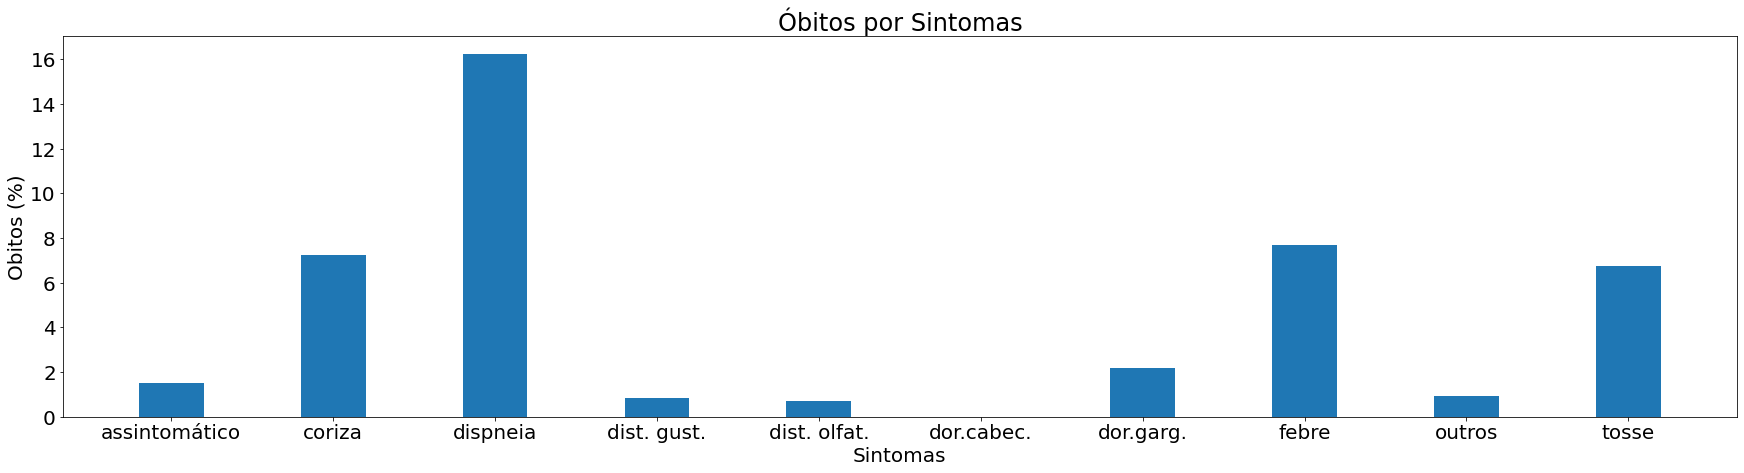

In [47]:
# realiza o plot do gráfico

sintomas = [s for s in sintomas_f]

taxa_obitos = [100*sintomas_f[s]/(sintomas_f[s]+freq_sintomas_rec[s]) for s in sintomas_f]

print(sintomas)
#numeros = [(sintomas_f[s]) for s in sintomas_f]
print(taxa_obitos)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(7)

plt.title('Óbitos por Sintomas')

plt.ylabel("Obitos (%)")
plt.xlabel("Sintomas")

plt.rc('font', size=20) 
plt.bar(sintomas, taxa_obitos, width=0.4)
plt.show()

No gráfico acima, podemos perceber que o sintoma mais comum entre os óbitos foi tosse, e o menos comum, disturbio de olfato. Agora, precisamos comparar com os sintomas de quem se recuperou.

## Conclusão

A partir do gráfico de comparação de sintomas de recuperados e óbitos, é possível notar que a dispnéia é o principal sintoma relacionado à óbito por covid-19, visto que cerca de 80% dos óbitos tiveram este sintoma, enquanto apenas 20% de quem se recuperou o teve.

Sintomas como febre e tosse tiveram foram muito presentes em casos de óbitos e recuperados.